In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

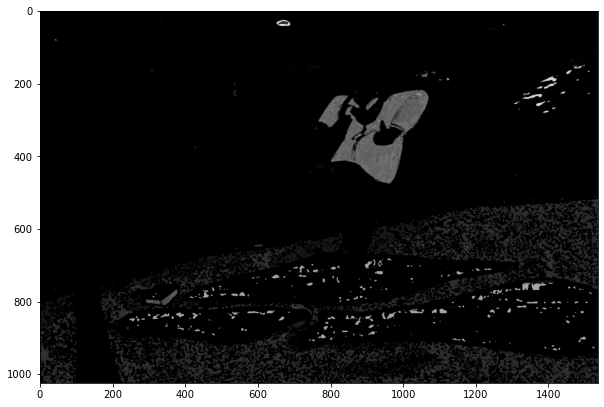

In [77]:
fname = "palatinate.jpg"
k=10
img = cv2.imread(fname, cv2.IMREAD_COLOR)
imgA = img[:, :img.shape[1] // 2].astype("int16")
imgB = img[:, img.shape[1] // 2 : ].astype("int16")
diff = cv2.cvtColor(((cv2.medianBlur(np.clip(((imgA ^ imgB) - 64), 0, 255).astype("uint8"), 5) / 255) * 255).astype("uint8"), cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 10))
plt.imshow(diff, cmap="gray")

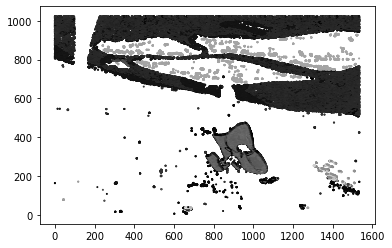

In [78]:
data = []
max_weight = np.max(diff)
for i in range(diff.shape[0]):
    for j in range(diff.shape[1]):
        val = diff[i, j]
        if val > 0:
            data.append([j, i, val / max_weight])
data = np.array(data)

plt.scatter(data[:, 0], data[:, 1], 1, c=data[:, 2], cmap="gray")

In [79]:
from sklearn.cluster import KMeans
import pandas as pd
k_means = KMeans(k)
clustering = k_means.fit_predict(data[:, 0:2], sample_weight=data[:, 2])
sizes = pd.value_counts(clustering)

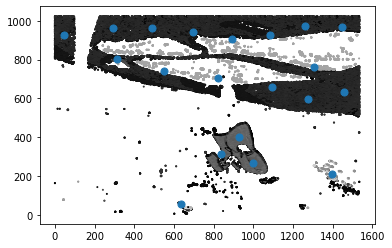

In [80]:
centers = k_means.cluster_centers_

plt.scatter(data[:, 0], data[:, 1], 1, c=data[:, 2], cmap="gray")
plt.scatter(centers[:, 0], centers[:, 1], 50)

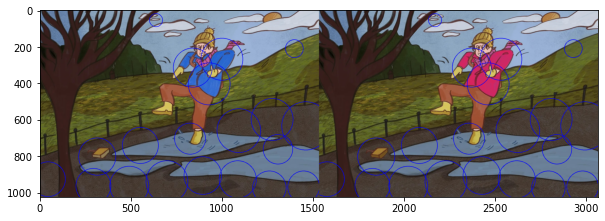

In [81]:
resultA = img[:, :img.shape[1] // 2 - 3]
resultB = img[:, 3 + img.shape[1] // 2 : ]
for i in range(len(centers)):
    size = np.int16(np.sqrt(sizes[i]))
    resultA = cv2.circle(resultA, centers[i].astype("uint16"), size, 0xffffff, 2)
    resultB = cv2.circle(resultB, centers[i].astype("uint16"), size, 0xffffff, 2)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(cv2.hconcat([resultA, resultB]), cv2.COLOR_BGR2RGB))